### Лабораторная работа №6 ###

In [109]:
import numpy as np
import matplotlib.pyplot as plt

Дана система дифференциальных уравнений:

$x' = y$

$y' = u$

$z' = -\frac{x}{(x^2 + y^2)^{3/2}}$

$u' = -\frac{y}{(x^2 + y^2)^{3/2}}$

$x(0) = 0.5; \;\;\; y(0) = z(0) = 0; \;\;\; u(0) = \sqrt(3) \approx 1.73; \;\;\; 0 < t \leq 20$

#### Решение будет получено двумя способами: ####
* ##### Явный метод Рунге-Кутты (4 порядок); #####
* ##### Метод Адамса (4 порядок). #####

In [110]:
initial = np.array([0.5, 0, 0, np.sqrt(3), 0])

def func(arr, time):
    return np.array([arr[2], arr[3], -arr[0] / (arr[0] ** 2 + arr[1] ** 2) ** (1.5), -arr[1] / \
                    (arr[0] ** 2 + arr[1] ** 2) ** (1.5), time])

1) Явный метод Рунге-Кутты (4 порядок):

In [111]:
def RungeKutta(func, init_time, init_array, h, iterations):
    time = init_time
    ret = [init_array]
    for i in range(iterations):
        k1 = func(ret[-1], time)
        k2 = func(ret[-1] + h / 2 * k1, time + h / 2)
        k3 = func(ret[-1] + h / 2 * k2, time + h / 2)
        k4 = func(ret[-1] + h * k3, time + h)
        time += h
        ret.append(ret[-1] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4))
        
    return ret

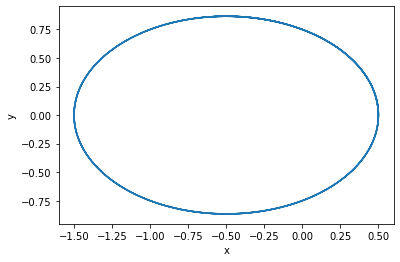

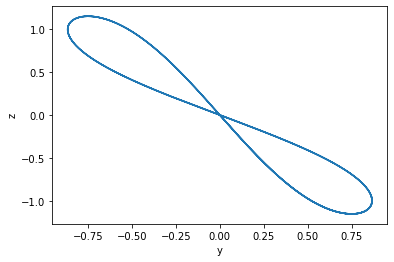

In [112]:
result = RungeKutta(func, 0, initial, 0.001, (int)(20/0.001))
x = []
y = []
z = []
for i in result:
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(y, z)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

2) Метод Адамса (4 порядок):

Так как используется метод Адамса 4-го порядка, нужно вычислить решения в 4 начальных точках.
Воспользуемся методом Рунге-Кутты:

In [113]:
initial = RungeKutta(func, 0, initial, 0.001, 3)
assert(len(initial) == 4)

def Adams(func, init_time, init_array, h, iterations):
    time = init_time
    ret = init_array
    for i in range(iterations):
        ret.append(ret[-1] + h * ((55 / 24) * func(ret[-1], time + 3 * h) - (59 / 24) * func(ret[-2], time + 2 * h) + \
                                  (37 / 24) * func(ret[-3], time + h) - (3 / 8) * func(ret[-4], time)))
        time += h
        
    return ret

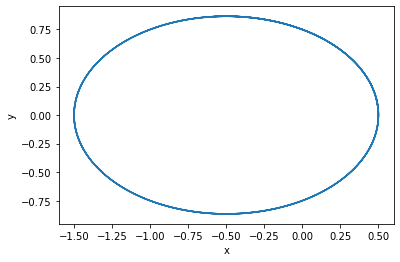

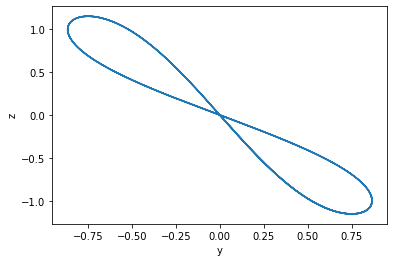

In [114]:
result = initial
result = Adams(func, initial[-1][-1], initial, 0.001, (int)(20/0.001))
x = []
y = []
z = []
for i in result:
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(y, z)
plt.xlabel('y')
plt.ylabel('z')
plt.show()